In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [6]:
df.columns = col_names

In [7]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [9]:
df.describe(include = 'all')

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [10]:
df.describe(include = 'all').T

,count,unique,top,freq
buying,1727,4,high,432
maint,1727,4,high,432
doors,1727,4,3,432
persons,1727,3,4,576
lug_boot,1727,3,med,576
safety,1727,3,med,576
class,1727,4,unacc,1209


In [11]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [12]:
df[df.duplicated()]

,buying,maint,doors,persons,lug_boot,safety,class


In [13]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df['buying'] = oe.fit_transform(df[['buying']])
df['maint'] = oe.fit_transform(df[['maint']])
df['doors'] = oe.fit_transform(df[['doors']])
df['persons'] = oe.fit_transform(df[['persons']])
df['lug_boot'] = oe.fit_transform(df[['lug_boot']])
df['safety'] = oe.fit_transform(df[['safety']])
df['class'] = oe.fit_transform(df[['class']])

In [14]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,2.0,2.0
1,3.0,3.0,0.0,0.0,2.0,0.0,2.0
2,3.0,3.0,0.0,0.0,1.0,1.0,2.0
3,3.0,3.0,0.0,0.0,1.0,2.0,2.0
4,3.0,3.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...
1722,1.0,1.0,3.0,2.0,1.0,2.0,1.0
1723,1.0,1.0,3.0,2.0,1.0,0.0,3.0
1724,1.0,1.0,3.0,2.0,0.0,1.0,2.0
1725,1.0,1.0,3.0,2.0,0.0,2.0,1.0


In [15]:
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
pred1 = clf1.predict(x_test)
print(pred1)

[0. 2. 2. 2. 2. 0. 2. 2. 3. 0. 2. 2. 0. 2. 0. 0. 2. 2. 0. 2. 2. 2. 0. 2.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 1. 0. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 0. 0.
 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 3. 2. 0. 2. 2. 0. 0. 0. 2. 0. 0. 2. 3. 2. 2. 2. 2. 2. 2. 2. 3.
 0. 3. 2. 2. 2. 2. 2. 2. 3. 0. 2. 2. 0. 2. 2. 2. 2. 3. 2. 0. 2. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 3. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 2. 0. 3. 0. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 1. 2. 2. 0. 2.
 2. 0. 2. 2. 2. 2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 3. 2. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 3. 0. 2. 0. 2. 0. 2. 0. 0. 0. 0. 2. 2.
 2. 2. 2. 2. 1. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 0. 0. 2. 2. 1. 2. 2. 2.
 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2.
 3. 2. 2. 2. 2. 0. 2. 0. 2. 2. 2. 3. 2. 2. 2. 1. 3. 2. 3. 2. 2. 1. 1. 0.
 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 2. 2. 0. 0. 2. 0.

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pred1, y_test))

0.9614643545279383


In [20]:
feature_scores = pd.Series(clf1.feature_importances_, index=x_train.columns).sort_values(ascending=False)

In [21]:
feature_scores

safety      0.283455
persons     0.226059
buying      0.182896
maint       0.153396
lug_boot    0.085045
doors       0.069149
dtype: float64

Text(0.5, 0, 'Feature Importance')

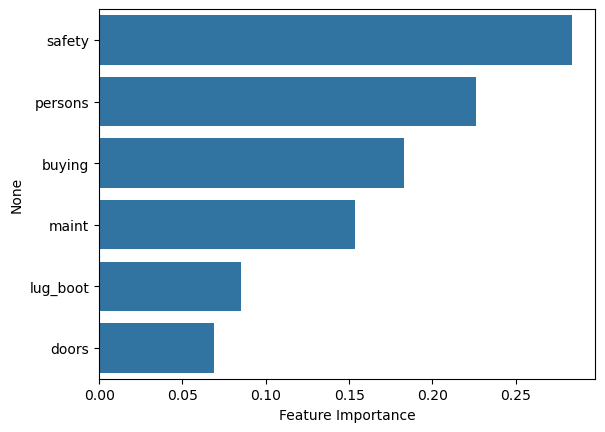

In [22]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance')

In [23]:
clf2 = RandomForestClassifier()
xn = df.drop(['doors', 'lug_boot', 'maint'], axis=1)
yn = df['class']
x_trainn, x_testn, y_trainn, y_testn = train_test_split(xn, yn, test_size=0.3)
clf2.fit(x_trainn, y_trainn)
new_pred = clf2.predict(x_testn)

In [24]:
accuracy_score(new_pred,y_testn)

1.0